## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical
from keras import optimizers
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
import random as rn
%load_ext tensorboard

# Clear any logs from previous runs
#!rm -rf ./logs/

import os

import datetime

## Importing Data

In [2]:
Base_path=os.getcwd().replace("\\","/")

In [3]:
df = pd.read_csv(os.getcwd().replace("\\","/")+'/Dataset/'+'Bank-Telemarketing.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### DATA PRE-PROCESSING

In [5]:
#Checking and Removing Duplicate Values

print('Duplicate values in the bank dataset are: ', df.duplicated().sum())

df.drop_duplicates(inplace=True)

print('After Dropping Duplicate values in the bank dataset are: ', df.duplicated().sum())

Duplicate values in the bank dataset are:  12
After Dropping Duplicate values in the bank dataset are:  0


In [6]:
#Removing Null values

print(df.isnull().sum().sum())

0


C:\Users\spoor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='count'>

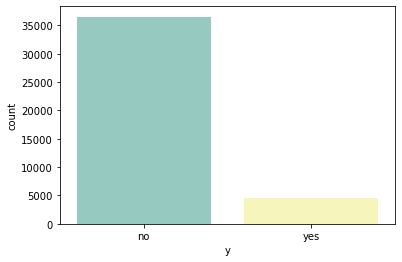

In [7]:
#Checking Class Imbalance

sns.countplot('y',data=df, palette= "Set3")

In [8]:
df_classe_majority = df[df.y=='no'] 
df_classe_minority = df[df.y=='yes']


print(df_classe_majority.shape)
print(df_classe_minority.shape)


(36537, 21)
(4639, 21)


In [9]:
# Upsample of minority class
from sklearn.utils import resample
df_classe_minority_upsampled = resample(df_classe_minority,
                                           replace = True,
                                           n_samples = df_classe_majority.shape[0] )

In [10]:
df_classe_minority_upsampled.shape

(36537, 21)

In [11]:
df_balanced_data = pd.concat([df_classe_majority, df_classe_minority_upsampled])
df_balanced_data.shape

(73074, 21)

### Making Class Balance

C:\Users\spoor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='count'>

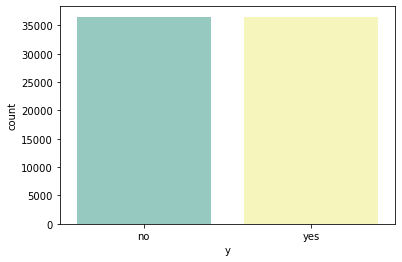

In [12]:
sns.countplot('y',data=df_balanced_data, palette="Set3")

In [13]:

df_balanced_data.loan = df_balanced_data.loan.map({'yes': 1, 'unknown': 0, 'no' : 0}).astype('uint8')
df_balanced_data.housing = df_balanced_data.housing.map({'yes': 1, 'unknown': 0, 'no' : 0}).astype('uint8')
df_balanced_data.default = df_balanced_data.default.map({'no': 1, 'unknown': 0, 'yes': 0}).astype('uint8')

In [14]:
cat_var=[]

for col in df_balanced_data.columns:
    if df_balanced_data[col].dtypes=="O":
        cat_var.append(col)
        print(col)
        
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


for i in cat_var:
    df_balanced_data[i]= le.fit_transform(df_balanced_data[i])

job
marital
education
contact
month
day_of_week
poutcome
y


In [15]:
df_balanced_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,1,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,1,0,1,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [16]:
df_balanced_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73074 entries, 0 to 37863
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             73074 non-null  int64  
 1   job             73074 non-null  int32  
 2   marital         73074 non-null  int32  
 3   education       73074 non-null  int32  
 4   default         73074 non-null  uint8  
 5   housing         73074 non-null  uint8  
 6   loan            73074 non-null  uint8  
 7   contact         73074 non-null  int32  
 8   month           73074 non-null  int32  
 9   day_of_week     73074 non-null  int32  
 10  duration        73074 non-null  int64  
 11  campaign        73074 non-null  int64  
 12  pdays           73074 non-null  int64  
 13  previous        73074 non-null  int64  
 14  poutcome        73074 non-null  int32  
 15  emp.var.rate    73074 non-null  float64
 16  cons.price.idx  73074 non-null  float64
 17  cons.conf.idx   73074 non-null 

In [17]:
corr_matrix = df_balanced_data.corr()
corr_matrix['y'].sort_values(ascending=False).head(10)

y                1.000000
duration         0.460170
previous         0.261124
default          0.167971
poutcome         0.163677
education        0.088650
cons.conf.idx    0.076511
marital          0.069702
age              0.044377
job              0.038050
Name: y, dtype: float64

### Splitting the Model

In [18]:
#Creating Independent and Depepndent Variables

X = df_balanced_data.iloc[:,0:-1]  #independent columns
y = df_balanced_data.iloc[:,-1]    #target column

#Scaling Independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2, random_state=0)

# Further splitting the training data into train and validation
feature_train, feature_val, label_train, label_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=0)

### Creating the Model

In [19]:
model = Sequential()

model.add(Dense(16, input_dim=20, activation='relu', name= 'input'))
model.add(Dense(32, activation='relu', name= 'hidden_1'))
model.add(Dense(64, activation='relu', name= 'hidden_2'))
model.add(Dense(128, activation='relu', name= 'hidden_3'))
model.add(Dense(256, activation='relu', name= 'hidden_4'))
model.add(Dense(512, activation='relu', name= 'hidden_5'))
model.add(Dense(512, activation='relu', name= 'hidden_6'))
model.add(Dense(1, input_dim=20, activation='sigmoid', name= 'output'))

#Adding the optimizer

opt = Adam(learning_rate= 0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics= ['accuracy'])


log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 16)                336       
                                                                 
 hidden_1 (Dense)            (None, 32)                544       
                                                                 
 hidden_2 (Dense)            (None, 64)                2112      
                                                                 
 hidden_3 (Dense)            (None, 128)               8320      
                                                                 
 hidden_4 (Dense)            (None, 256)               33024     
                                                                 
 hidden_5 (Dense)            (None, 512)               131584    
                                                                 
 hidden_6 (Dense)            (None, 512)               2

### Fitting the Model

In [20]:
training_results = model.fit(x=feature_train, 
                             y=label_train, 
                             verbose=1, 
                             batch_size=175, 
                             epochs=30 , 
                             validation_data= (feature_val,label_val),
                             callbacks=[tensorboard_callback])

#Visualizing the tensorboard
%tensorboard --logdir logs/fit

Epoch 1/30
301/301 [==============================] - 3s 8ms/step - loss: 0.3908 - accuracy: 0.8324 - val_loss: 0.3327 - val_accuracy: 0.8618
Epoch 2/30
301/301 [==============================] - 2s 7ms/step - loss: 0.3154 - accuracy: 0.8667 - val_loss: 0.3028 - val_accuracy: 0.8726
Epoch 3/30
301/301 [==============================] - 2s 7ms/step - loss: 0.2943 - accuracy: 0.8760 - val_loss: 0.2905 - val_accuracy: 0.8818
Epoch 4/30
301/301 [==============================] - 2s 7ms/step - loss: 0.2776 - accuracy: 0.8840 - val_loss: 0.2788 - val_accuracy: 0.8857
Epoch 5/30
301/301 [==============================] - 2s 7ms/step - loss: 0.2668 - accuracy: 0.8899 - val_loss: 0.2653 - val_accuracy: 0.8883
Epoch 6/30
301/301 [==============================] - 2s 7ms/step - loss: 0.2576 - accuracy: 0.8944 - val_loss: 0.2613 - val_accuracy: 0.8921
Epoch 7/30
301/301 [==============================] - 2s 7ms/step - loss: 0.2515 - accuracy: 0.8981 - val_loss: 0.2595 - val_accuracy: 0.8950
Epoch 

Reusing TensorBoard on port 6006 (pid 26232), started 20:35:22 ago. (Use '!kill 26232' to kill it.)

### Plotting accuracy and loss for validation and train dataset

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


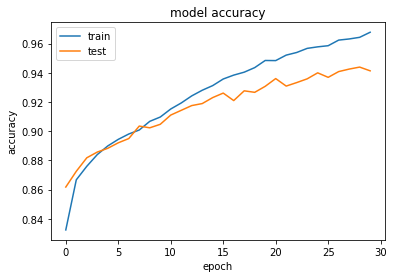

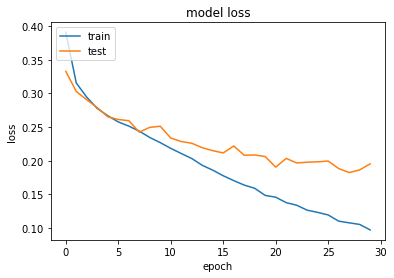

In [21]:
# list all data in history
print(training_results.history.keys())
#summarize history for accuracy
#plt.figure(figsize=(20,20))
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(training_results.history['loss'])
plt.plot(training_results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Evaluating the results of the model 

In [22]:
results = model.evaluate(X_test, y_test, verbose=2)

print("Loss:", results[0])
print("Accuracy:", results[1])

457/457 - 1s - loss: 0.1880 - accuracy: 0.9431 - 1s/epoch - 2ms/step
Loss: 0.187956765294075
Accuracy: 0.9431406259536743


### Exporting the Model

In [23]:
# Save the entire model as a SavedModel.

model.save(os.getcwd().replace("\\","/")+'/saved_model/2')

INFO:tensorflow:Assets written to: C:/Users/spoor/Desktop/cis-325/Final Exam/saved_model/2\assets
